In [25]:
import scipy as sp
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import sklearn.metrics

In [26]:


def get_ipl(sizes, scores):
    def ipl(beta):
        a, b, c = tuple(beta.astype(float))
        pl = lambda x: a - b * x **(-c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(ipl, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a - b * x **(-c)

def get_ipl_no_bias(sizes, scores):
    def ipl_no_bias(beta):
        b, c = tuple(beta.astype(float))
        pl = lambda x: b * x **(-c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    b, c = tuple(sp.optimize.least_squares(ipl_no_bias, np.array([1,1]), method="lm").x)
    return (b, c), lambda x: b * x **(-c)

def get_log2(sizes, scores):
    def log2(beta):
        a, c = tuple(beta.astype(float))
        pl = lambda x: -a * np.log(x) + c
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(log2, np.array([1,1]), method="lm").x)
    return (a, c), lambda x: -a * np.log(x) + c

def get_exp3(sizes, scores):
    def exp3(beta):
        a, b, c = tuple(beta.astype(float))
        pl = lambda x: a * np.exp(-b*x) + c
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(exp3, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a * np.exp(-b*x) + c

def get_exp2(sizes, scores):
    def exp2(beta):
        a, b = tuple(beta.astype(float))
        pl = lambda x: a * np.exp(-b*x)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b = tuple(sp.optimize.least_squares(exp2, np.array([1,1]), method="lm").x)
    return (a, b), lambda x: a * np.exp(-b*x)

def get_lin2(sizes, scores):
    def lin2(beta):
        a, b = tuple(beta.astype(float))
        pl = lambda x: a * x + b
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b = tuple(sp.optimize.least_squares(lin2, np.array([1,1]), method="lm").x)
    return (a, b), lambda x: a*x + b

def get_constant(sizes, scores):
    
    a = scores[-1]
    return a, lambda x: (a + x) - x

def get_vp(sizes, scores):
    def vp(beta):
        a, b, c = tuple(beta.astype(float))
        fun = lambda x: np.exp(a + b/x + c * np.log(x))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(vp, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: np.exp(a + b/x + c * np.log(x))


def get_mmf(sizes, scores):
    def mmf(beta):
        a, b, c, d = tuple(beta.astype(float))
        fun = lambda x: (a * b + c * x ** d)/(b + x ** d)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(mmf, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: (a * b + c * x ** d)/(b + x ** d)

def get_wbl4(sizes, scores):
    def wbl4(beta):
        a, b, c, d = tuple(beta.astype(float))
        fun = lambda x: (c - b * np.exp(-a*(x**d)))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(wbl4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: (c - b * np.exp(-a*(x**d)))

def get_exp4(sizes, scores):
    def exp4(beta):
        a, b, c, d = tuple(beta.astype(float))
        exp4 = lambda x: c - np.exp(-a*(x**d) + b)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(exp4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: c - np.exp(-a*(x**d) + b)

def get_expp3(sizes, scores):
    def expp3(beta):
        a, b, c = tuple(beta.astype(float))
        expp3 = lambda x: c - np.exp((x-b)**a)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(expp3, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: c - np.exp((x-b)**a)


def get_pow4(sizes, scores):
    def pow4(beta):
        a, b, c, d = tuple(beta.astype(float))
        pow4 = lambda x: c - (-a*x + b)**d
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c, d = tuple(sp.optimize.least_squares(pow4, np.array([1,1,1,1]), method="lm").x)
    return (a, b, c, d), lambda x: c - (-a*x + b)**d


def get_ilog2(sizes, scores):
    def ilog2(beta):
        a, c = tuple(beta.astype(float))
        ilog2 = lambda x: c - (a/np.log(x))
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(ilog2, np.array([1,1]), method="lm").x)
    return (a, c), lambda x: c - (a/np.log(x))

def get_expd3(sizes, scores):
    def expd3(beta):
        a, b, c = tuple(beta.astype(float))
        expd3 = lambda x: c - (c - a)*np.exp(-b*x)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((pl(size) - scores[i])**2)
        return np.array(penalty)

    a, c = tuple(sp.optimize.least_squares(expd3, np.array([1,1,1,1]), method="lm").x)
    return (a, c), lambda x: c - (c - a)*np.exp(-b*x)

def get_logpower(sizes, scores):
    def logpower(beta):
        a, b, c = tuple(beta.astype(float))
        fun = lambda x: a / (1 + (x / np.exp(b))**c)
        penalty = []
        for i, size in enumerate(sizes):
            penalty.append((fun(size) - scores[i])**2)
        return np.array(penalty)

    a, b, c = tuple(sp.optimize.least_squares(logpower, np.array([1,1,1]), method="lm").x)
    return (a, b, c), lambda x: a / (1 + (x / np.exp(b))**c)

In [32]:


model_names    = ['pow3', 'pow2', 'log2', 'exp2', 'exp3', 'lin2', 'baseline_last_constant']
popular_models = [get_ipl, get_ipl_no_bias, get_log2, get_exp2, get_exp3, get_lin2, get_constant]
assert(len(model_names) == len(popular_models))

def get_multiple_extrapolations(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25 * 5)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                for i in range(0,len(model_names)):
                    extrapolation_fun = popular_models[i]
                    for offset in range(4, len(sizes)):
                        beta, model = extrapolation_fun(sizes[:offset], scores[:offset])
                        predictions = np.round(model(sizes), 4)
                        assert(len(predictions) == len(sizes))
                        rows.append([openmlid, learner, outer, inner, sizes[offset - 1], predictions, model_names[i], beta])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "max_anchor_seen", "prediction", "curve_model", "beta"])

def get_anchors_and_scores(df):
    rows = []
    pbar = tqdm(total = len(pd.unique(df["openmlid"])) * len(pd.unique(df["learner"])) * 25 * 5)
    for openmlid, df_dataset in df.groupby("openmlid"):
        for learner, df_learner in df_dataset.groupby("learner"):
            for (inner, outer), df_seeded in df_learner.groupby(["inner_seed", "outer_seed"]):
                sizes, scores = df_seeded["size_train"].values, df_seeded["score_valid"].values
                rows.append([openmlid, learner, outer, inner, sizes, scores])
                pbar.update(1)
    pbar.close()
    return pd.DataFrame(rows, columns=["openmlid", "learner", "outer_seed", "inner_seed", "anchor_prediction", "score"])


In [37]:



def metrics_per_row(row, score, anchor_prediction):
    
    max_anchor_seen = row.max_anchor_seen
    prediction = row.prediction
    max_anchor = np.max(anchor_prediction)
    percentage_train = np.round(max_anchor_seen/max_anchor*100)/100

    trn_ind = np.argwhere(max_anchor_seen == anchor_prediction)[0][0] # recover offset
    trn_indices = range(0,(trn_ind+1))
    tst_indices = range(trn_ind+1,len(anchor_prediction))
    n_trn = len(trn_indices)
    
    y_trn_hat = prediction[trn_indices]
    y_trn = score[trn_indices]
    y_tst_hat = prediction[tst_indices]
    y_tst = score[tst_indices]

    MSE_trn = sklearn.metrics.mean_squared_error([y_trn], [y_trn_hat])
    MSE_tst = sklearn.metrics.mean_squared_error([y_tst], [y_tst_hat])
    MSE_tst_last = sklearn.metrics.mean_squared_error([y_tst[-1]],[y_tst_hat[-1]])
    L1_trn = sklearn.metrics.mean_absolute_error([y_trn], [y_trn_hat])
    L1_tst = sklearn.metrics.mean_absolute_error([y_tst], [y_tst_hat])
    L1_tst_last = sklearn.metrics.mean_absolute_error([y_tst[-1]],[y_tst_hat[-1]])
    
    return [MSE_trn,MSE_tst,MSE_tst_last,L1_trn,L1_tst,L1_tst_last,max_anchor_seen,percentage_train,n_trn,row.curve_model]

In [29]:
def get_info(df_info, openmlid, learner, outer_seed, inner_seed):
    q = df_info.query('openmlid==@openmlid and learner==@learner and outer_seed==@outer_seed and inner_seed == @inner_seed')
    q = q.iloc[0,:]
    return [q.anchor_prediction, q.score]

In [35]:
def df_metrics(df,df_info):
    pbar = tqdm(total=len(df))
    rows_metrics = []
    for i in range(0,len(df)):
        row = df.iloc[i,:]
        anchor_prediction, score = get_info(df_info, row.openmlid, row.learner, row.outer_seed, row.inner_seed)
        rows_metrics.append(metrics_per_row(row,score,anchor_prediction))
        pbar.update(1)
    pbar.close()
    df_metrics = pd.DataFrame(rows_metrics,columns=['MSE trn','MSE tst','MSE tst last','L1 trn','L1 tst','L1 tst last','max anchor seen','percentage','n','curve_model'])
    return df_metrics

In [33]:
df = pd.read_csv("lcdb.csv")
df_small = df[df['openmlid'] == 11]
print('computing extrapolations...')
df_extrapolations = get_multiple_extrapolations(df_small)
print('computing anchors and scores...')
df_anchors_and_scores = get_anchors_and_scores(df_small)


computing extrapolations...


  0%|          | 0/2500 [00:00<?, ?it/s]

C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in exp
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in double_scalars
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars


computing anchors and scores...


  0%|          | 0/2500 [00:00<?, ?it/s]

In [38]:
print('computing metrics....')
df_metrics = df_metrics(df_extrapolations,df_anchors_and_scores)

computing metrics....


  0%|          | 0/104055 [00:00<?, ?it/s]

C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\sklearn\metrics\_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\tjviering\Anaconda3\envs\lcfit\lib\site-packages\sklearn\metrics\_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


# Cleaning the data and processing

In [41]:
print('some strange values:')
print(df_metrics.isin([np.nan, np.inf, -np.inf]).sum())
df_metrics_na = df_metrics.replace([np.inf, -np.inf], np.nan)


some strange values:
MSE trn            0
MSE tst            1
MSE tst last       1
L1 trn             0
L1 tst             0
L1 tst last        0
max anchor seen    0
percentage         0
n                  0
curve_model        0
dtype: int64


In [42]:
df_extrapolations_no_curve_model = df_extrapolations.loc[:, df_extrapolations.columns != 'curve_model']
df_total = pd.concat([df_extrapolations_no_curve_model,df_metrics_na],axis=1)
df_total

,openmlid,learner,outer_seed,inner_seed,max_anchor_seen,prediction,beta,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n,curve_model
0,11,SVC_linear,0,0,45,"[0.7374, 0.8583, 0.8606, 0.8606, 0.8606, 0.860...","(0.860623993356554, 2120265334832.5996, 10.991...",1.012500e-06,0.000285,0.000342,0.000975,0.015583,0.0185,45,0.09,4,pow3
1,11,SVC_linear,0,0,64,"[0.7373, 0.8584, 0.8604, 0.8605, 0.8605, 0.860...","(0.860461025621901, 4231682484964.645, 11.2414...",7.900000e-07,0.000339,0.000339,0.000860,0.018400,0.0184,64,0.13,5,pow3
2,11,SVC_linear,0,0,91,"[0.7389, 0.8523, 0.8529, 0.8529, 0.8529, 0.852...","(0.8529423531321395, 1.5887583558997214e+16, 1...",5.150167e-05,0.000117,0.000117,0.006717,0.010800,0.0108,91,0.18,6,pow3
3,11,SVC_linear,0,0,128,"[0.7383, 0.8514, 0.8519, 0.8519, 0.8519, 0.851...","(0.8519386452313842, 4.108471819709431e+16, 14...",6.277714e-05,0.000096,0.000096,0.007486,0.009800,0.0098,128,0.25,7,pow3
4,11,SVC_linear,0,0,181,"[0.7387, 0.8508, 0.8513, 0.8513, 0.8513, 0.851...","(0.8513400964814366, 6.9779894353697816e+16, 1...",6.770500e-05,0.000085,0.000085,0.007900,0.009200,0.0092,181,0.36,8,pow3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104050,11,sklearn.tree.ExtraTreeClassifier,4,24,64,"[0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.666...",0.6667,7.194980e-03,0.003814,0.007691,0.073640,0.042100,0.0877,64,0.13,5,baseline_last_constant
104051,11,sklearn.tree.ExtraTreeClassifier,4,24,91,"[0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.666...",0.6667,5.995817e-03,0.004767,0.007691,0.061367,0.052625,0.0877,91,0.18,6,baseline_last_constant
104052,11,sklearn.tree.ExtraTreeClassifier,4,24,128,"[0.6491, 0.6491, 0.6491, 0.6491, 0.6491, 0.649...",0.6491,6.021283e-03,0.008826,0.011088,0.062657,0.081900,0.1053,128,0.25,7,baseline_last_constant
104053,11,sklearn.tree.ExtraTreeClassifier,4,24,181,"[0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.666...",0.6667,4.535583e-03,0.009379,0.007691,0.048225,0.096450,0.0877,181,0.36,8,baseline_last_constant


In [43]:
df_total.describe()

,openmlid,outer_seed,inner_seed,max_anchor_seen,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n
count,104055.0,104055.00000,104055.000000,104055.000000,104055.000000,1.040540e+05,1.040540e+05,104055.000000,1.040550e+05,1.040550e+05,104055.000000,104055.000000,104055.000000
mean,11.0,2.00000,11.983182,128.139253,0.004220,8.225286e+17,4.935171e+18,0.034750,2.775701e+178,1.665421e+179,128.139253,0.254595,6.482341
std,0.0,1.41422,7.207805,72.502392,0.031484,2.441333e+20,1.464800e+21,0.046719,inf,inf,72.502392,0.144064,1.703798
min,11.0,0.00000,0.000000,45.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,45.000000,0.090000,4.000000
25%,11.0,1.00000,6.000000,64.000000,0.000268,8.526400e-04,6.916900e-04,0.014288,2.620000e-02,2.630000e-02,64.000000,0.130000,5.000000
50%,11.0,2.00000,12.000000,128.000000,0.000898,4.548589e-03,6.225210e-03,0.026275,6.050000e-02,7.890000e-02,128.000000,0.250000,6.000000
75%,11.0,3.00000,18.000000,181.000000,0.002512,2.245203e-02,4.297329e-02,0.043380,1.327667e-01,2.073000e-01,181.000000,0.360000,8.000000
max,11.0,4.00000,24.000000,256.000000,0.899012,7.859923e+22,4.715954e+23,0.947350,2.888256e+183,1.732953e+184,256.000000,0.510000,9.000000


In [44]:
df_total.isin([np.nan, np.inf, -np.inf]).sum()

openmlid           0
learner            0
outer_seed         0
inner_seed         0
max_anchor_seen    0
prediction         0
beta               0
MSE trn            0
MSE tst            1
MSE tst last       1
L1 trn             0
L1 tst             0
L1 tst last        0
max anchor seen    0
percentage         0
n                  0
curve_model        0
dtype: int64

In [45]:
df_total_clean = df_total.dropna(axis=0)


In [46]:
df_total_clean.describe()

,openmlid,outer_seed,inner_seed,max_anchor_seen,MSE trn,MSE tst,MSE tst last,L1 trn,L1 tst,L1 tst last,max anchor seen,percentage,n
count,104054.0,104054.000000,104054.000000,104054.000000,104054.000000,1.040540e+05,1.040540e+05,104054.000000,1.040540e+05,1.040540e+05,104054.000000,104054.000000,104054.000000
mean,11.0,2.000000,11.983182,128.140052,0.004220,8.225286e+17,4.935171e+18,0.034750,1.604604e+06,9.624804e+06,128.140052,0.254596,6.482365
std,0.0,1.414227,7.207840,72.502283,0.031484,2.441333e+20,1.464800e+21,0.046719,3.703394e+08,2.221514e+09,72.502283,0.144064,1.703789
min,11.0,0.000000,0.000000,45.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,45.000000,0.090000,4.000000
25%,11.0,1.000000,6.000000,64.000000,0.000268,8.526400e-04,6.916900e-04,0.014288,2.620000e-02,2.630000e-02,64.000000,0.130000,5.000000
50%,11.0,2.000000,12.000000,128.000000,0.000898,4.548589e-03,6.225210e-03,0.026275,6.050000e-02,7.890000e-02,128.000000,0.250000,6.000000
75%,11.0,3.000000,18.000000,181.000000,0.002512,2.245203e-02,4.297329e-02,0.043380,1.327650e-01,2.073000e-01,181.000000,0.360000,8.000000
max,11.0,4.000000,24.000000,256.000000,0.899012,7.859923e+22,4.715954e+23,0.947350,1.144804e+11,6.867280e+11,256.000000,0.510000,9.000000


# Learning curve of a learning curve

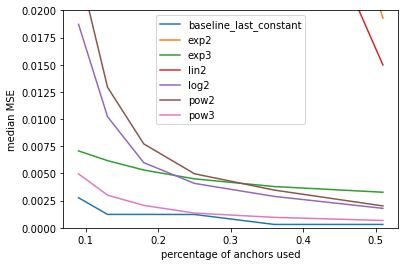

In [47]:
selected = df_total_clean

for curve_model, df_curve_model in selected.groupby("curve_model"):

    Y = df_curve_model.groupby('percentage')['MSE tst last'].median()
    Y_sigma = df_curve_model.groupby('percentage')['MSE tst last'].std()
    X = df_curve_model.groupby('percentage')['MSE tst last'].median().index

    plt.plot(X,Y,label=curve_model)
    
plt.xlabel('percentage of anchors used')
plt.ylabel('median MSE')
plt.legend()
plt.ylim([0,0.02])
plt.show()


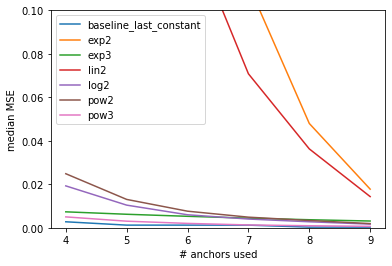

In [50]:
selected = df_total_clean

for curve_model, df_curve_model in selected.groupby("curve_model"):

    Y = df_curve_model.groupby('n')['MSE tst last'].median()
    Y_sigma = df_curve_model.groupby('n')['MSE tst last'].std()
    X = df_curve_model.groupby('n')['MSE tst last'].median().index

    plt.plot(X,Y,label=curve_model)
    
plt.xlabel('# anchors used')
plt.ylabel('median MSE')
plt.legend()
plt.ylim([0,0.1])
plt.show()


In [52]:
df_total_clean.groupby('curve_model')['MSE tst last'].median()

curve_model
baseline_last_constant    0.001232
exp2                      0.113906
exp3                      0.004872
lin2                      0.079186
log2                      0.004872
pow2                      0.005991
pow3                      0.001648
Name: MSE tst last, dtype: float64

In [53]:
df_total_clean['learner']

0                               SVC_linear
1                               SVC_linear
2                               SVC_linear
3                               SVC_linear
4                               SVC_linear
                        ...               
104050    sklearn.tree.ExtraTreeClassifier
104051    sklearn.tree.ExtraTreeClassifier
104052    sklearn.tree.ExtraTreeClassifier
104053    sklearn.tree.ExtraTreeClassifier
104054    sklearn.tree.ExtraTreeClassifier
Name: learner, Length: 104054, dtype: object

In [54]:
df_total_clean.groupby('learner')['MSE tst last'].median()

learner
SVC_linear                                                     0.001347
SVC_poly                                                       0.022605
SVC_rbf                                                        0.007569
SVC_sigmoid                                                    0.045646
sklearn.discriminant_analysis.LinearDiscriminantAnalysis       0.003758
sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis    0.024775
sklearn.ensemble.ExtraTreesClassifier                          0.007208
sklearn.ensemble.GradientBoostingClassifier                    0.015939
sklearn.ensemble.RandomForestClassifier                        0.007285
sklearn.linear_model.LogisticRegression                        0.002783
sklearn.linear_model.PassiveAggressiveClassifier               0.003416
sklearn.linear_model.Perceptron                                0.004914
sklearn.linear_model.RidgeClassifier                           0.001989
sklearn.linear_model.SGDClassifier                      

# Learner influence

(0.0, 0.1)

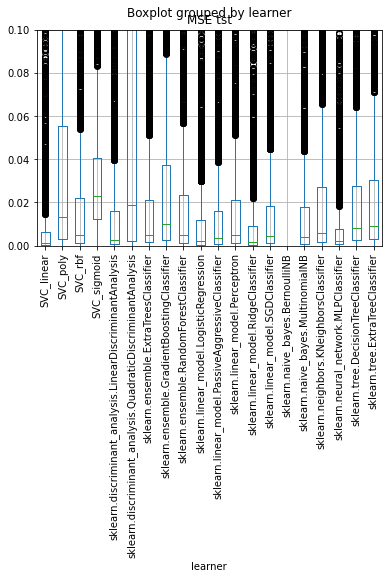

In [59]:
df_total_clean.boxplot(column='MSE tst',by='learner',rot=90)
plt.ylim([0,0.1])

# Curve model influence

(0.0, 0.1)

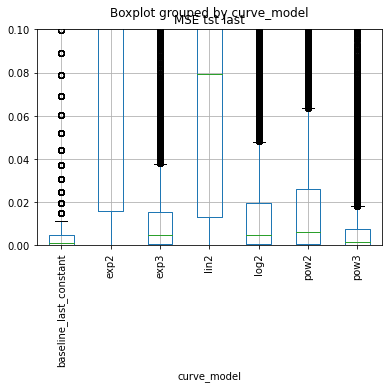

In [56]:
df_total_clean.boxplot(column='MSE tst last',by='curve_model',rot=90)
plt.ylim([0,0.1])